# Lab 4: Humidity

In this lab, a variable capacitor was used to measure the humidity in the room.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Hardware Setup

![Circuit Diagram](img/circuit.png)

This circuit was set up as a simple RC circuit. The humidity sensor is a variable capacitor, so the 

In [33]:
# Raw Data
# Calibration data in (capacitance (pF), RMS (V))
calibration_data = [
    (100, 0.3380),
    (120, 0.3242),
    (150, 0.2916),
    (180, 0.2681),
    (220, 0.2389),
]

calibration_data_df = pd.DataFrame(calibration_data)
calibration_data_df.columns = ['Capacitance', 'RMS']
calibration_data_df.set_index('RMS', inplace=True)

humidity_norm_rms = 0.2685
humidity_breath_rms = 0.2616

humidity = 53  # RH, in %. Found by asking siri

raw_data_csv = 'data/humidity_measurements.csv'
raw_data_df = pd.read_csv(raw_data_csv)


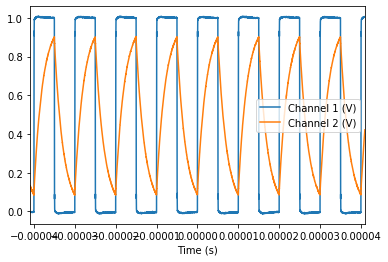

In [34]:
# Plot raw data
raw_data_df.plot(x='Time (s)', y=['Channel 1 (V)', 'Channel 2 (V)'])

Text(0, 0.5, 'Capacitance (pF)')

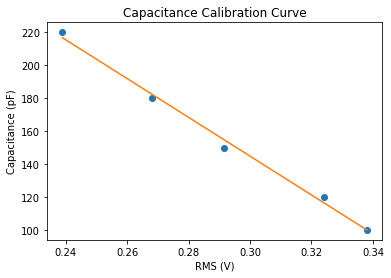

In [28]:
# Generate Linear Regression and plot
cap_cal = np.poly1d(np.polyfit(x=calibration_data_df.index, y=calibration_data_df['Capacitance'], deg=1))
calibration_data_df['trendline'] = cap_cal(calibration_data_df.index)
ax = plt.plot(calibration_data_df.index, calibration_data_df['Capacitance'], 'o')
ax = plt.plot(calibration_data_df.index, calibration_data_df['trendline'], '-')
plt.title('Capacitance Calibration Curve')
plt.xlabel('RMS (V)')
plt.ylabel('Capacitance (pF)')

In [29]:
# Find capacitance of humidity data
humidity_norm_cap = cap_cal(humidity_norm_rms)
humidity_breath_cap = cap_cal(humidity_breath_rms)
print("Humidity Normal Capacitance: {} pF".format(humidity_norm_cap))
print("Humidity with breathing Capacitance: {} pF".format(humidity_breath_cap))

Humidity Normal Capacitance: 181.85242826221042 pF
Humidity with breathing Capacitance: 189.97507217638002 pF


In [30]:
# Calibration to get humidity

# Calibration data in (RH (%), capacitance (pF))
# From https://media.digikey.com/pdf/Data%20Sheets/Measurement%20Specialties%20PDFs/HS1101LF.pdf
hum_cal_data = [
    (0, 161.6),
    (5, 163.6),
    (10, 165.4),
    (15, 167.2),
    (20, 169.0),
    (25, 170.7),
    (30, 172.3),
    (35, 173.9),
    (40, 175.5),
    (45, 177.0),
    (50, 178.5),
    (55, 180.0),
    (60, 181.4),
    (65, 182.9),
    (70, 184.3),
    (75, 185.7),
    (80, 187.2),
    (85, 188.6),
    (90, 190.1),
    (95, 191.6),
    (100, 193.1),
]

hum_cal_df = pd.DataFrame(hum_cal_data)

hum_cal_df.columns = ['RH', 'Capacitance']
hum_cal_df.set_index('Capacitance', inplace=True)

Text(0, 0.5, 'RH (%)')

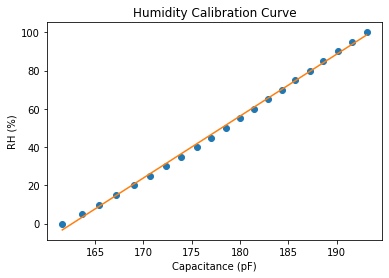

In [31]:
hum_cal = np.poly1d(np.polyfit(x=hum_cal_df.index, y=hum_cal_df['RH'], deg=1))
hum_cal_df['trendline'] = hum_cal(hum_cal_df.index)
ax = plt.plot(hum_cal_df.index, hum_cal_df['RH'], 'o')
ax = plt.plot(hum_cal_df.index, hum_cal_df['trendline'], '-')

plt.title('Humidity Calibration Curve')
plt.xlabel('Capacitance (pF)')
plt.ylabel('RH (%)')

In [32]:
# Calculate humidities
humidity_norm = hum_cal(humidity_norm_cap)
humidity_breath = hum_cal(humidity_breath_cap)
print("Humidity Normal: {}%".format(humidity_norm))
print("Humidity with breathing: {}%".format(humidity_breath))

Humidity Normal: 62.21059206081827%
Humidity with breathing: 88.47543471940241%
